In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# Steps in ML Project
1. Importing Required Libraries
2. Loading Data 
3. EDA
4. Data Preprocessing
5. Feature Engineering
6. Feature Selection
7. Modeling
8. Evaluation
9. Predicting

# **Importing Libraries**

In [2]:
import numpy as np #linear_algebra
import pandas as pd #Data_preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer

# Loading Data

In [3]:
df_train = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
df_test = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

# **Exploratory Data Analysis**

In [4]:
pd.set_option('display.max_columns', None)
df_train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,1.0,0385,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,2.0,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,1.0,0329 1300,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [5]:
#Checking the presence of Null Values in the training data set 
df_train.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

***It is observed that null values are present in the following columns: 
Cross_Street, Weapon_Used_Code, Weapon_Description, Victim_Sex, Victime_Descent, Modus Operandi.***

In [6]:
df_train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [8]:
cat_cols = df_train.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(df_train[col].value_counts())

Location
6TH                                        33
7TH                                        32
VERMONT                      AV            31
6TH                          ST            31
7TH                          ST            30
                                           ..
2700 E  1ST                          ST     1
9300    SWINTON                      AV     1
MCKINLEY                                    1
WADE                         ST             1
DALTON                       AV             1
Name: count, Length: 12399, dtype: int64
Cross_Street
BROADWAY                           56
FIGUEROA                           43
VERMONT                      AV    40
FIGUEROA                     ST    34
MAIN                               33
                                   ..
VENTURA CANYON               BL     1
E  ORLANDO                          1
D                            ST     1
CABRILLO                     AV     1
HAVELOCK                            1
Name: count, 

In [9]:
df_train['Victim_Descent'].nunique()

17

In [10]:
df_train['Premise_Description'].nunique()

216

In [11]:
df_train['Status_Description'].nunique()

5

In [12]:
df_train['Modus_Operandi'].unique()

array(['0385', '0906 0352 0371 0446 1822 0344 0416 0417', '0329 1202',
       ..., '0416 0446 2004 0913', '1822 0209 0344 1414 1420',
       '1202 2038 0913 0602 1242 0553'], dtype=object)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


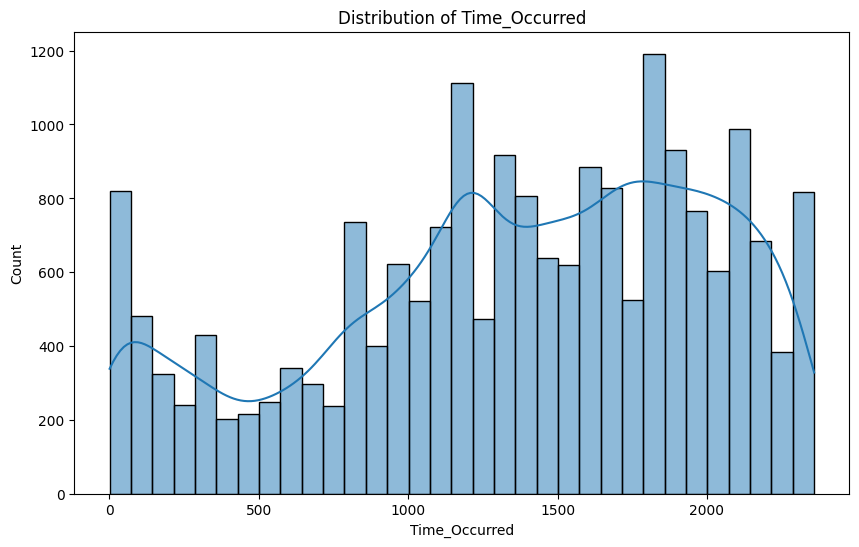

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


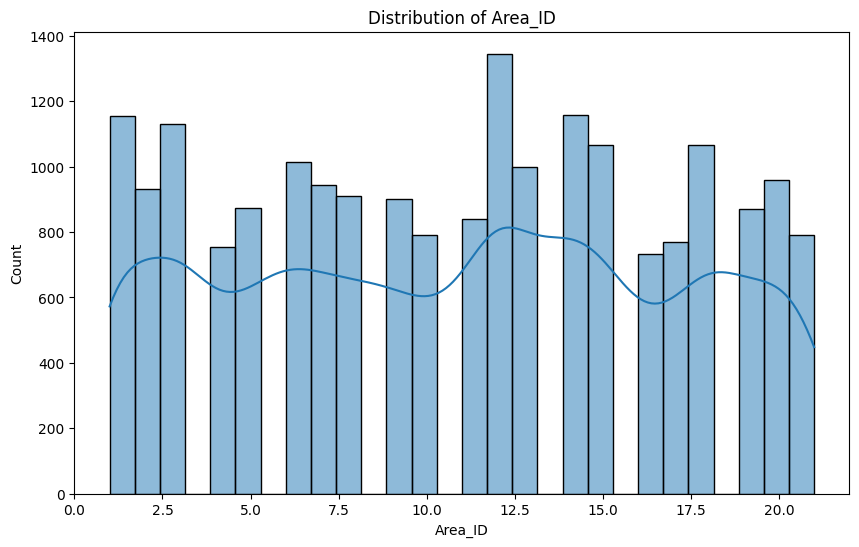

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


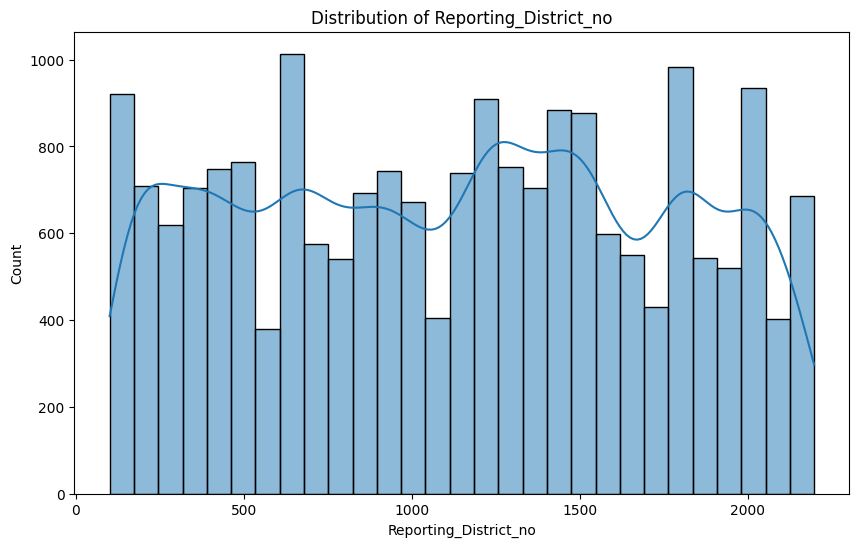

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


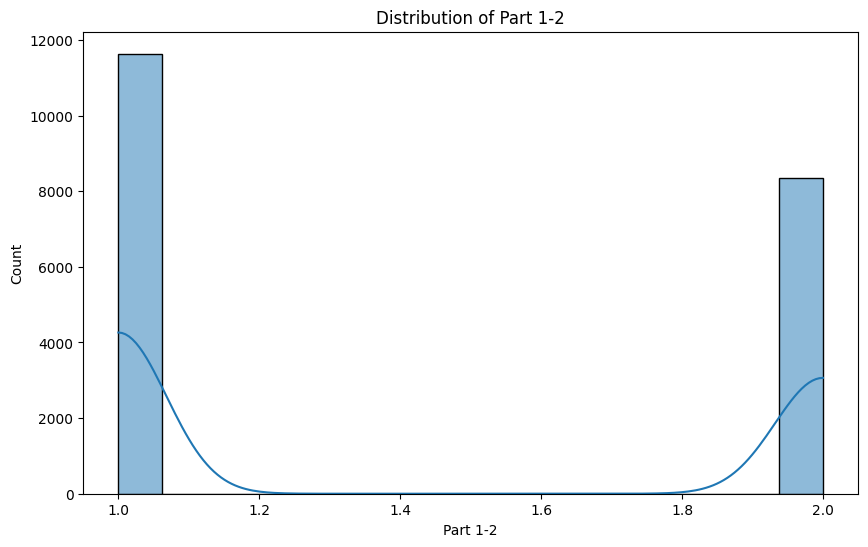

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


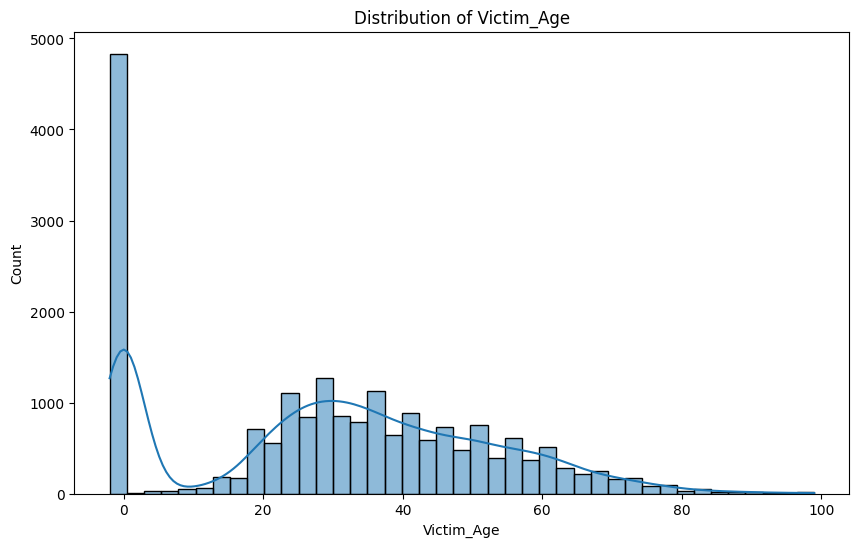

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


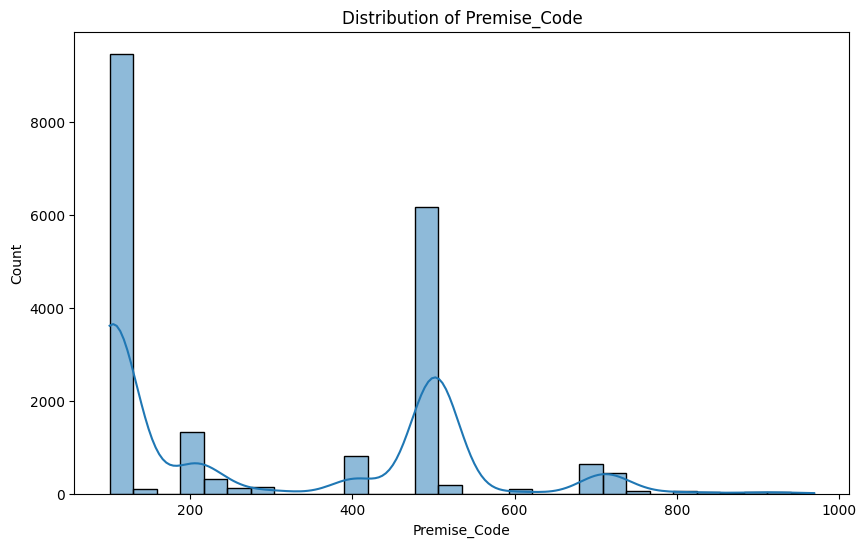

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


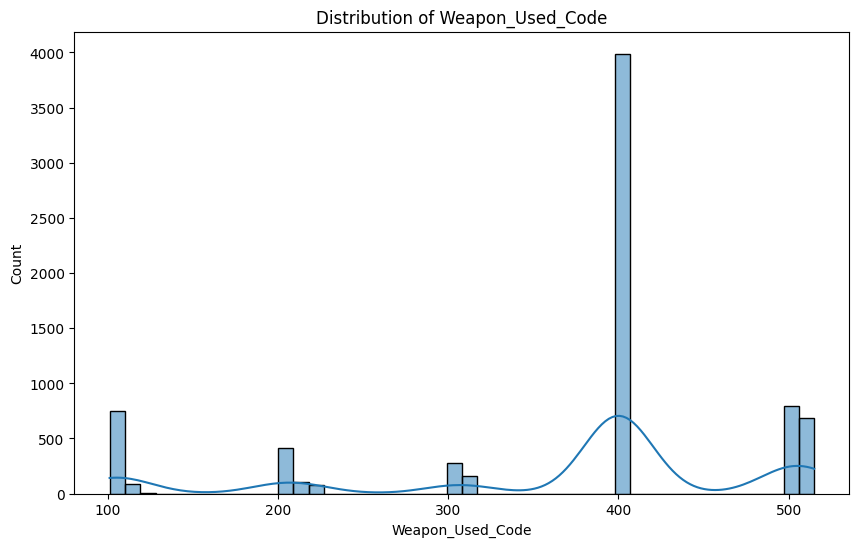

In [13]:
# Distribution of numerical features
num_cols = ['Time_Occurred', 'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code', 'Weapon_Used_Code']
for col in num_cols:
   plt.figure(figsize=(10, 6))
   sns.histplot(df_train[col], kde=True)
   plt.title(f'Distribution of {col}')
   plt.show()

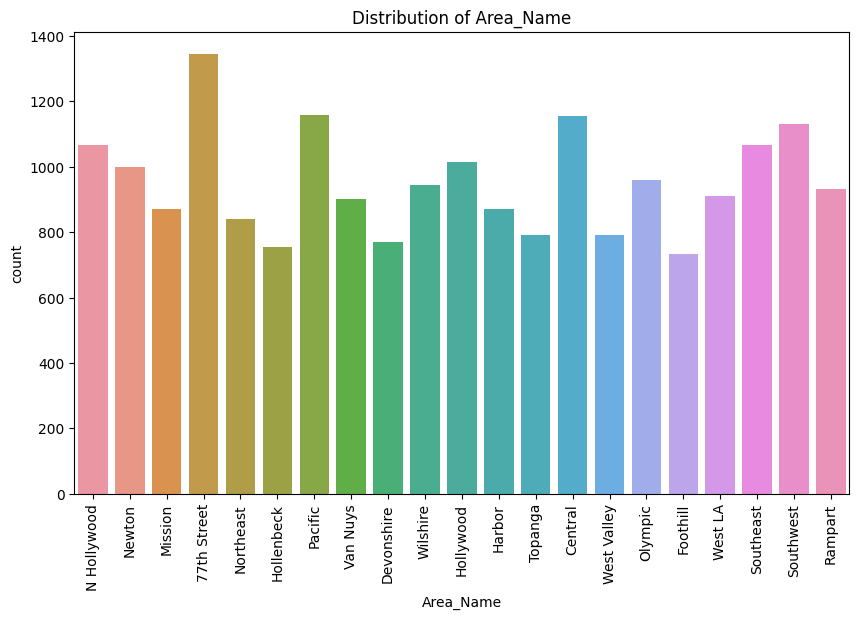

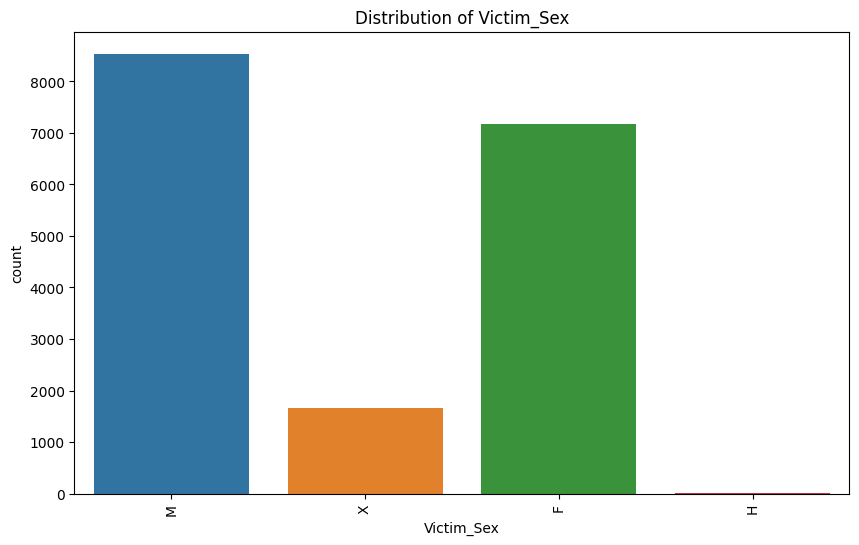

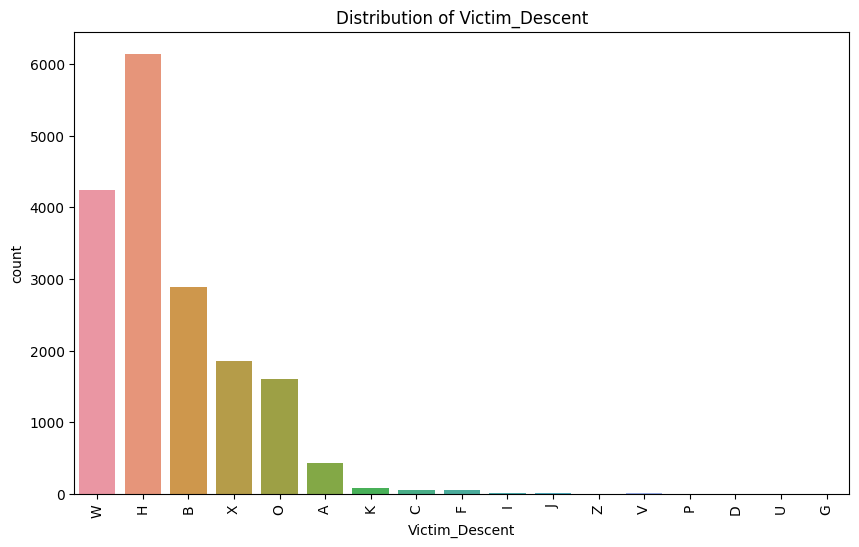

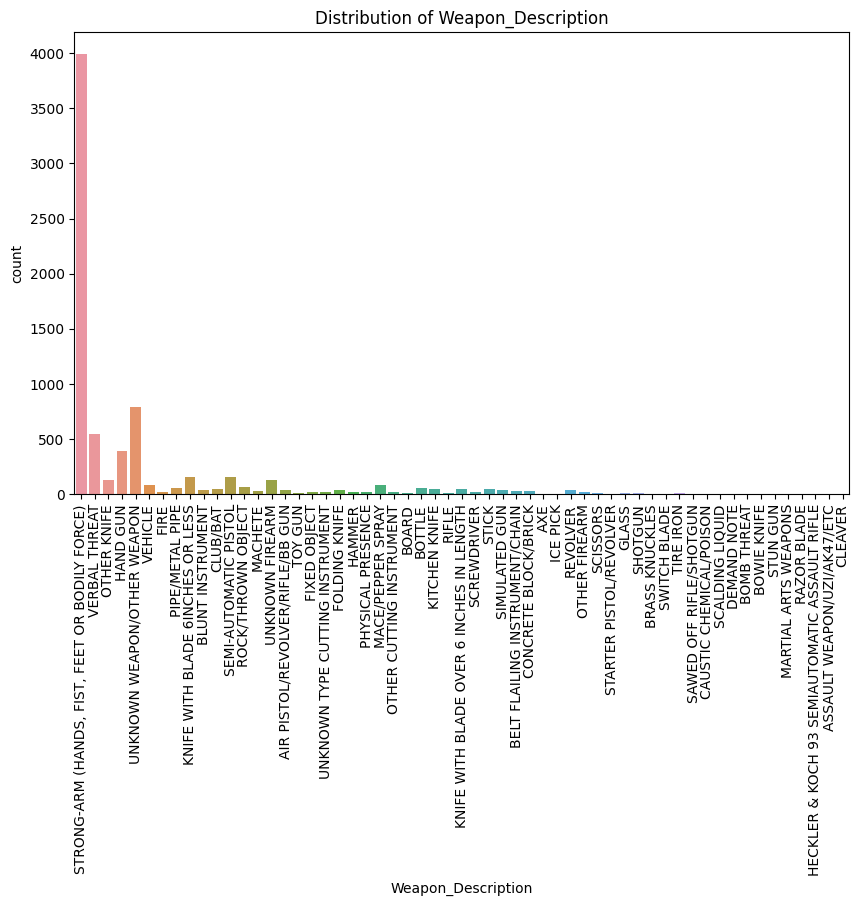

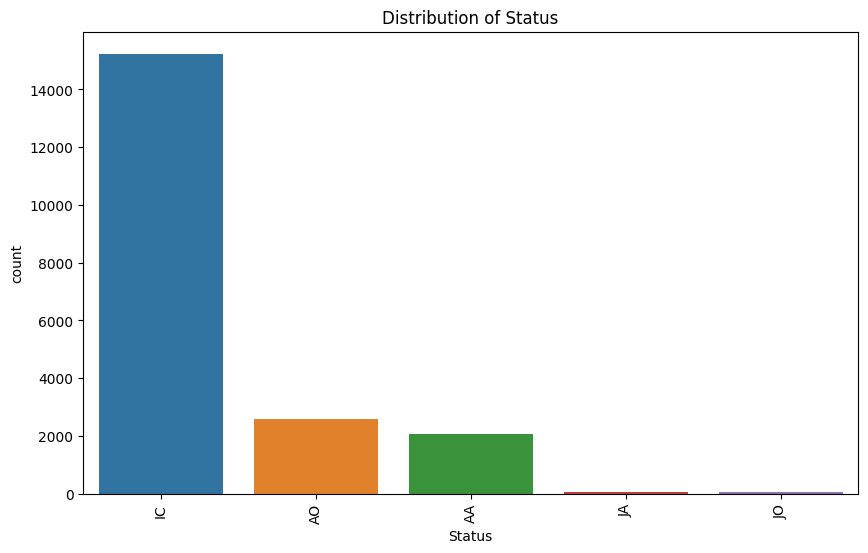

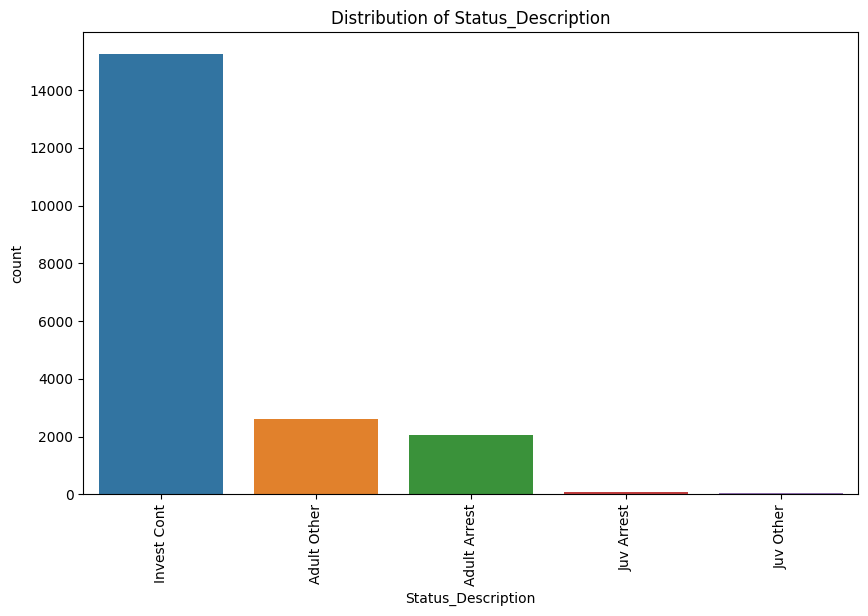

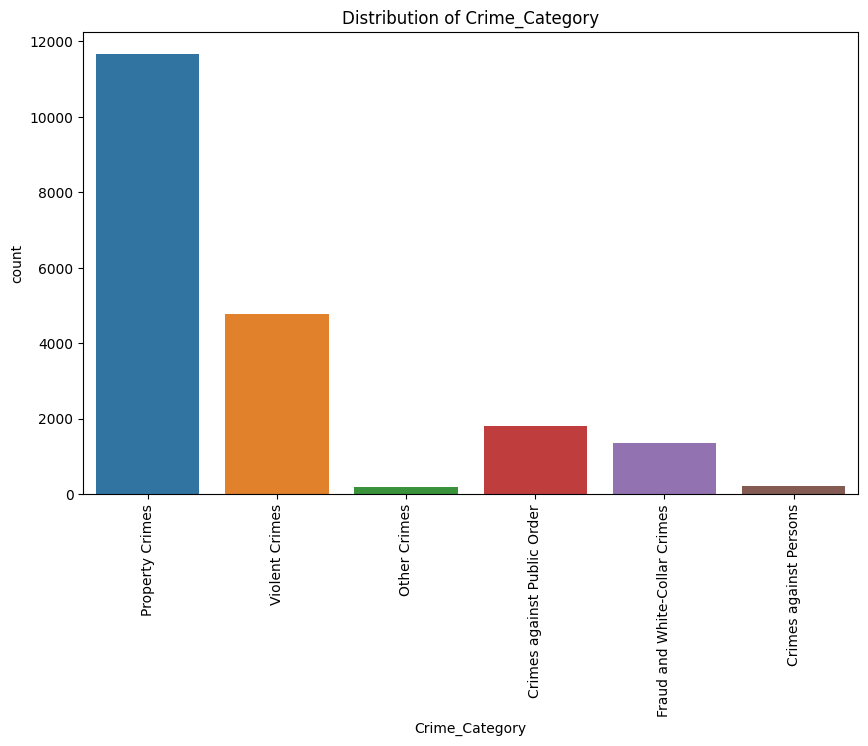

In [14]:
# Bar plots for categorical features
cat_cols = ['Area_Name', 'Victim_Sex', 'Victim_Descent', 'Weapon_Description', 'Status', 'Status_Description', 'Crime_Category']
for col in cat_cols:
   plt.figure(figsize=(10, 6))
   sns.countplot(data=df_train, x=col)
   plt.title(f'Distribution of {col}')
   plt.xticks(rotation=90)
   plt.show()

# # **Converting Dates to datetime object**

In [15]:
#Creating a function which takes the date as expressed in the given dataframe as input and returns the date in datetime format.
def parse_date_time(date_str):
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y %I:%M:%S %p')
    except ValueError:
        # Handle entries with only time
        return pd.to_datetime('1970-01-01 ' + date_str)

# Apply function to convert Date_Column
df_train['Date_Reported'] = df_train['Date_Reported'].apply(parse_date_time)
df_train['Date_Occurred'] = df_train['Date_Occurred'].apply(parse_date_time)
df_test['Date_Reported'] = df_test['Date_Reported'].apply(parse_date_time)
df_test['Date_Occurred'] = df_test['Date_Occurred'].apply(parse_date_time)

In [16]:
#Extracting Year, Date and Month from the date column.
for df in [df_train, df_test]:
    df['Reported_Year'] = df['Date_Reported'].dt.year
    df['Reported_Day'] = df['Date_Reported'].dt.day
    df['Reported_Month'] = df['Date_Reported'].dt.month
    df['Occurred_Year'] = df['Date_Occurred'].dt.year
    df['Occurred_Day'] = df['Date_Occurred'].dt.day
    df['Occurred_Month'] = df['Date_Occurred'].dt.month
    df['Days_Between'] = (df['Date_Reported'] - df['Date_Occurred']).dt.days

df_train = df_train.drop(columns=['Date_Reported', 'Date_Occurred'], errors='ignore')
df_test = df_test.drop(columns=['Date_Reported', 'Date_Occurred'], errors='ignore')

# Splitting the training dataset

In [17]:
X = df_train.drop(columns = "Crime_Category")
y = df_train["Crime_Category"]

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [19]:
X_train.isnull().sum() #Checking the presence of null values in X_train

Location                     0
Cross_Street             13234
Latitude                     0
Longitude                    0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2195
Victim_Age                   0
Victim_Sex                2105
Victim_Descent            2105
Premise_Code                 0
Premise_Description          1
Weapon_Used_Code         10182
Weapon_Description       10182
Status                       0
Status_Description           0
Reported_Year                0
Reported_Day                 0
Reported_Month               0
Occurred_Year                0
Occurred_Day                 0
Occurred_Month               0
Days_Between                 0
dtype: int64

In [20]:
X_train.shape

(16000, 26)

In [21]:
X_train['Modus_Operandi'].head()

8118     1309 1822 0342 0355 0344 0432 0326 0327 1313
10171                                            0344
9399                    2000 1813 0913 0416 1310 2002
12669                                       0329 1300
18809                                            1402
Name: Modus_Operandi, dtype: object

> # DATA PREPROCESSING 
***HANDLING MISSING VALUES-IMPUTATION***

In [22]:
#Selecting columns where null values are to be replaced by constant or the most-frequent value.
nan_cols_constant = ['Cross_Street', 'Weapon_Used_Code', 'Weapon_Description'] #Numerical columns
nan_cols_mstfrq = ['Modus_Operandi','Victim_Sex','Victim_Descent'] #Non-numeric columns

In [23]:
Constant_Imputer = SimpleImputer(strategy = 'constant', fill_value = -1)
X_train[nan_cols_constant] = Constant_Imputer.fit_transform(X_train[nan_cols_constant])
X_valid[nan_cols_constant] = Constant_Imputer.transform(X_valid[nan_cols_constant])
df_test[nan_cols_constant] = Constant_Imputer.transform(df_test[nan_cols_constant])

Mostfreq_Imputer = SimpleImputer(strategy = 'most_frequent')
X_train[nan_cols_mstfrq] = Mostfreq_Imputer.fit_transform(X_train[nan_cols_mstfrq])
X_valid[nan_cols_mstfrq] = Mostfreq_Imputer.transform(X_valid[nan_cols_mstfrq])
df_test[nan_cols_mstfrq] = Mostfreq_Imputer.transform(df_test[nan_cols_mstfrq])

In [24]:
X_train.shape

(16000, 26)

# MODUS OPERANDI

In [25]:
X_train['Modus_Operandi_Tokens'] = X_train['Modus_Operandi'].apply(lambda x: x.split())
X_valid['Modus_Operandi_Tokens'] = X_valid['Modus_Operandi'].apply(lambda x: x.split())
df_test['Modus_Operandi_Tokens'] = df_test['Modus_Operandi'].apply(lambda x: x.split())

In [26]:
X_train.shape

(16000, 27)

In [27]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
# Transform the tokens into a binary matrix
modus_operandi_encoded_tr = mlb.fit_transform(X_train['Modus_Operandi_Tokens'])
modus_operandi_encoded_v = mlb.transform(X_valid['Modus_Operandi_Tokens'])
modus_operandi_encoded_te = mlb.transform(df_test['Modus_Operandi_Tokens'])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['0114', '0364', '0402', '0544', '0912', '0915', '0933', '1215', '1245', '1248', '1301', '1401', '1404', '1410', '1903', '2011', '2022'] will be ignored
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['0218', '0306', '0320', '0393', '0403', '0518', '0540', '0854', '1011', '1231', '1255', '1301', '1314', '1401', '1410', '1903', '2011', '2022', '2026', '2043', '2044', '2208', '2308', '3030'] will be ignored
  warnings.warn(


In [28]:
X_train.shape

(16000, 27)

In [29]:
# Convert the binary matrix to a DataFrame and set indices
modus_operandi_tr = pd.DataFrame(modus_operandi_encoded_tr, columns=mlb.classes_, index=X_train.index)
modus_operandi_v = pd.DataFrame(modus_operandi_encoded_v, columns=mlb.classes_, index=X_valid.index)
modus_operandi_te = pd.DataFrame(modus_operandi_encoded_te, columns=mlb.classes_, index=df_test.index)

In [30]:
X_train.shape

(16000, 27)

In [31]:
# Concatenate the original DataFrame with the new binary DataFrame
X_train = pd.concat([X_train, modus_operandi_tr], axis=1)
X_valid = pd.concat([X_valid, modus_operandi_v], axis=1)
df_test = pd.concat([df_test, modus_operandi_te], axis=1)

In [32]:
X_train.shape

(16000, 491)

In [33]:
# Drop the original Modus_Operandi and tokens columns
X_train.drop(['Modus_Operandi', 'Modus_Operandi_Tokens'], axis=1, inplace=True)
X_valid.drop(['Modus_Operandi', 'Modus_Operandi_Tokens'], axis=1, inplace=True)
df_test.drop(['Modus_Operandi', 'Modus_Operandi_Tokens'], axis=1, inplace=True)

In [34]:
X_train.shape

(16000, 489)

In [35]:
#Storing categorical columns and numerical columns in different variables.
num_cols = X_train.select_dtypes(exclude = 'object')
num_cols.columns
cat_cols = X_train.select_dtypes(include = 'object')
cat_cols.columns


Index(['Location', 'Cross_Street', 'Area_Name', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Weapon_Used_Code', 'Weapon_Description',
       'Status', 'Status_Description'],
      dtype='object')

In [36]:
cat_cols_OH = ['Victim_Sex', 'Status', 'Status_Description']
cat_cols_OE =['Location','Victim_Descent','Cross_Street','Area_Name','Premise_Description','Weapon_Used_Code','Weapon_Description']
#As columns contain mixed datatype values, thus, converting the entries in the columns to string datatype.
X_train[cat_cols_OE] = X_train[cat_cols_OE].astype(str)
X_valid[cat_cols_OE] = X_valid[cat_cols_OE].astype(str)
df_test[cat_cols_OE] = df_test[cat_cols_OE].astype(str)

In [37]:
OneHot = OneHotEncoder(sparse_output=False, handle_unknown = 'ignore')
X_train_cat_cols_OH = pd.DataFrame(OneHot.fit_transform(X_train[cat_cols_OH]), index=X_train.index, columns=OneHot.get_feature_names_out())
X_valid_cat_cols_OH = pd.DataFrame(OneHot.transform(X_valid[cat_cols_OH]),index=X_valid.index, columns=OneHot.get_feature_names_out())
df_test_cat_cols_OH = pd.DataFrame(OneHot.transform(df_test[cat_cols_OH]),index=df_test.index, columns=OneHot.get_feature_names_out())

In [38]:
OrdEnc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1, encoded_missing_value=-1)

X_train[cat_cols_OE] = pd.DataFrame(OrdEnc.fit_transform(X_train[cat_cols_OE]), index=X_train.index, columns=OrdEnc.get_feature_names_out())

X_valid[cat_cols_OE] = pd.DataFrame(OrdEnc.transform(X_valid[cat_cols_OE]), index=X_valid.index, columns=OrdEnc.get_feature_names_out()) 

df_test[cat_cols_OE] = pd.DataFrame(OrdEnc.transform(df_test[cat_cols_OE]),index=df_test.index, columns=OrdEnc.get_feature_names_out())

In [39]:
X_train = X_train.join(X_train_cat_cols_OH, rsuffix='_OH')
X_valid = X_valid.join(X_valid_cat_cols_OH, rsuffix='_OH')
df_test = df_test.join(df_test_cat_cols_OH, rsuffix='_OH')

# Drop original categorical columns if they still exist
X_train = X_train.drop(columns=cat_cols_OH, errors='ignore')
X_valid = X_valid.drop(columns=cat_cols_OH, errors='ignore')
df_test = df_test.drop(columns=cat_cols_OH, errors='ignore')

# ENCODING THE TARGET COLUMN

In [40]:
labEnc = LabelEncoder()
y_train_pp = pd.DataFrame(labEnc.fit_transform(y_train))
y_valid_pp = pd.DataFrame(labEnc.transform(y_valid))

# Feature Scaling

In [41]:
num_cols_sc= ['Latitude', 'Longitude', 'Victim_Age']
St_scaler = StandardScaler()
X_train[num_cols_sc] = St_scaler.fit_transform(X_train[num_cols_sc])
X_valid[num_cols_sc] = St_scaler.transform(X_valid[num_cols_sc])
df_test[num_cols_sc] = St_scaler.transform(df_test[num_cols_sc])

In [42]:
X_train.shape

(16000, 500)

In [43]:
X_train.fillna(-1, inplace = True)
X_valid.fillna(-1, inplace = True)
df_test.fillna(-1, inplace = True)

# Feature Selection

In [44]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
mi_scores = mutual_info_classif(X_train, y_train_pp, discrete_features='auto')
mi_scores_df = pd.DataFrame(mi_scores, index=X_train.columns, columns=['MI Score'])
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Display the MI scores
print(mi_scores_df)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                              MI Score
Weapon_Description            0.448757
Weapon_Used_Code              0.446702
0344                          0.270707
Part 1-2                      0.212345
0416                          0.155818
...                                ...
1017                          0.000000
1018                          0.000000
1020                          0.000000
1021                          0.000000
Status_Description_Juv Other  0.000000

[500 rows x 1 columns]


In [45]:
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train_pp)
X_valid_selected = selector.transform(X_valid)
df_test_selected = selector.transform(df_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Logistic Regression Model

In [46]:
lr_model = LogisticRegression(max_iter=12000, random_state=42)
lr_model.fit(X_train, y_train_pp)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=12000, random_state=42)

In [47]:
y_pred_val_lr = lr_model.predict(X_valid)
accuracy_lr = accuracy_score(y_valid_pp, y_pred_val_lr)
print(accuracy_lr)

0.864


# KNN ALGORITHM

In [48]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train_pp)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [49]:
y_pred_val_knn = knn.predict(X_valid)
accuracy_knn = accuracy_score(y_valid_pp, y_pred_val_knn)
print(accuracy_knn)

0.5545


# Descision Tree Algo

In [50]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train_pp)

DecisionTreeClassifier(random_state=42)

In [51]:
y_pred = clf.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid_pp, y_pred))

Accuracy: 0.91925


# BAGGING

In [52]:
from sklearn.ensemble import BaggingClassifier
base_estimator = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

In [53]:
bagging_clf.fit(X_train, y_train_pp)
y_pred = bagging_clf.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid_pp, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.94025


# HYPERPARAMETER TUNING FOR BAGGINGCLASSFIER

In [54]:
param_grid = {
    'n_estimators': [50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'estimator__max_depth': [None, 10] } 


In [55]:
grid_search = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=1)

In [56]:
grid_search.fit(X_train, y_train_pp)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Parameters: {'estimator__max_depth': None, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Best Score: 0.9504999999999999


In [57]:
best_bagging_clf = grid_search.best_estimator_

# Boosting

In [58]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [59]:
base_estimator = DecisionTreeClassifier()
ada_boost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
ada_boost_model.fit(X_train, y_train_pp)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [60]:
y_pred_ada = ada_boost_model.predict(X_valid)
print("AdaBoost Model Accuracy:", accuracy_score(y_valid_pp, y_pred_ada))

AdaBoost Model Accuracy: 0.91975


# MULTI LAYER PERCEPTRON ALGO

In [61]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train_pp)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)

In [62]:
y_pred_mlp = mlp_model.predict(X_valid)
print("MLP Model Accuracy:", accuracy_score(y_valid_pp, y_pred_mlp))

MLP Model Accuracy: 0.85975


# SVM ALGORITHM

In [63]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, gamma='scale') 
svm.fit(X_train, y_train_pp)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [64]:
y_pred_svm = svm.predict(X_valid)
accuracy_svm = accuracy_score(y_valid_pp, y_pred_svm)
print(accuracy_svm)

0.5715


# SUBMISSION

# BAGGING SUBMISSION

In [65]:
df_test_pred = best_bagging_clf.predict(df_test)

In [66]:
df_test_pred_decoded = labEnc.inverse_transform(df_test_pred)
df_test_pred_decoded = df_test_pred_decoded.ravel()

In [67]:
submission = pd.DataFrame({'ID' : np.arange(1,5001),
                          'Crime_Category' : df_test_pred_decoded})
submission = submission.to_csv("submission.csv", index=False)

In [68]:
sub = pd.read_csv("/kaggle/working/submission.csv")
sub

,ID,Crime_Category
0,1,Violent Crimes
1,2,Property Crimes
2,3,Fraud and White-Collar Crimes
3,4,Property Crimes
4,5,Crimes against Public Order
...,...,...
4995,4996,Property Crimes
4996,4997,Property Crimes
4997,4998,Violent Crimes
4998,4999,Violent Crimes
